# League of Legends Basic Skidoodling...

In [222]:
import os
import requests, json
import time
import numpy as np
import pickle
import matplotlib.pyplot as plt

You'll need to go get yourself an API key [here](https://developer.riotgames.com/).  Once you have a key, store it in a file in the current working directory using a snippet of code like the following:

`
with open(working_dir + '\\api_key.txt', 'w') as api_file:
  api_file.write('YOUR_API_KEY')
`

Once you've done that, the code below will load in your API key and make it available for your skidoodling.

In [210]:
working_dir = '.'
os.chdir(working_dir)
with open(working_dir + '\\api_key.txt', 'r') as api_file:
    api_key =  api_file.read()

In [211]:
# Constants...
REGION_KEY = 'na'
JO_SUMMONER = '360JoScope'
CORRIE_SUMMONER = 'CorkyTheSuperb'

SUMMONER = JO_SUMMONER

In [212]:
# Get summoner ID from summoner name...

api_dict = {'api_key': api_key}
base_url = 'https://{0}.api.pvp.net/api/lol/{0}/v1.4/summoner/by-name/{1}'
url = base_url.format(REGION_KEY, SUMMONER)
print url
info = requests.get(summoner_url, params = api_dict).json()
#print info
summoner_id = list(info.values())[0]['id']
print summoner_id

https://na.api.pvp.net/api/lol/na/v1.4/summoner/by-name/360JoScope
63592135


In [213]:
# Get a list of matches using summoner ID...

api_dict = {'api_key': api_key}
base_url = 'https://{0}.api.pvp.net/api/lol/{0}/v2.2/matchlist/by-summoner/{1}'
url = base_url.format(REGION_KEY, summoner_id)
print url
info = requests.get(url, params = api_dict).json()
#print info
match_ids = [x['matchId'] for x in list(info['matches'])]
print len(match_ids)

https://na.api.pvp.net/api/lol/na/v2.2/matchlist/by-summoner/63592135
259


In [214]:
# Get match info using match IDs...

api_dict = {
  'api_key': api_key,
  'includeTimeline': True
}
base_url = 'https://{0}.api.pvp.net/api/lol/{0}/v2.2/match/{1}'

match_info = np.empty(0)
for match_id in match_ids:
  url = base_url.format(REGION_KEY, match_id)
  print url
  info = requests.get(url, params = api_dict).json()
  #print info
  match_info = np.append(match_info, info)
  time.sleep(1)

https://na.api.pvp.net/api/lol/na/v2.2/match/2059742868
https://na.api.pvp.net/api/lol/na/v2.2/match/2059167169
https://na.api.pvp.net/api/lol/na/v2.2/match/2058885553
https://na.api.pvp.net/api/lol/na/v2.2/match/2058275171
https://na.api.pvp.net/api/lol/na/v2.2/match/2058050207
https://na.api.pvp.net/api/lol/na/v2.2/match/2057950683
https://na.api.pvp.net/api/lol/na/v2.2/match/2057895304
https://na.api.pvp.net/api/lol/na/v2.2/match/2057843894
https://na.api.pvp.net/api/lol/na/v2.2/match/2057742125
https://na.api.pvp.net/api/lol/na/v2.2/match/2057453536
https://na.api.pvp.net/api/lol/na/v2.2/match/2057297126
https://na.api.pvp.net/api/lol/na/v2.2/match/2057119438
https://na.api.pvp.net/api/lol/na/v2.2/match/2056925349
https://na.api.pvp.net/api/lol/na/v2.2/match/2056796121
https://na.api.pvp.net/api/lol/na/v2.2/match/2056450793
https://na.api.pvp.net/api/lol/na/v2.2/match/2056384356
https://na.api.pvp.net/api/lol/na/v2.2/match/2056350161
https://na.api.pvp.net/api/lol/na/v2.2/match/205

In [215]:
# Save the match info because it's a bit of a pain to query for it each time...

with open('match_info.pickle', 'wb') as pickle_file:
  pickle.dump(match_info, pickle_file)

In [216]:
# Load the match info (if you saved it before)...

with open('match_info.pickle', 'rb') as pickle_file:
  match_info = pickle.load(pickle_file)

In [217]:
match_info[0]['timeline']['frames']

[{u'participantFrames': {u'1': {u'currentGold': 500,
    u'dominionScore': 0,
    u'jungleMinionsKilled': 0,
    u'level': 1,
    u'minionsKilled': 0,
    u'participantId': 1,
    u'position': {u'x': 561, u'y': 581},
    u'teamScore': 0,
    u'totalGold': 500,
    u'xp': 0},
   u'10': {u'currentGold': 500,
    u'dominionScore': 0,
    u'jungleMinionsKilled': 0,
    u'level': 1,
    u'minionsKilled': 0,
    u'participantId': 10,
    u'position': {u'x': 14237, u'y': 14579},
    u'teamScore': 0,
    u'totalGold': 500,
    u'xp': 0},
   u'2': {u'currentGold': 500,
    u'dominionScore': 0,
    u'jungleMinionsKilled': 0,
    u'level': 1,
    u'minionsKilled': 0,
    u'participantId': 2,
    u'position': {u'x': 561, u'y': 361},
    u'teamScore': 0,
    u'totalGold': 500,
    u'xp': 0},
   u'3': {u'currentGold': 500,
    u'dominionScore': 0,
    u'jungleMinionsKilled': 0,
    u'level': 1,
    u'minionsKilled': 0,
    u'participantId': 3,
    u'position': {u'x': 351, u'y': 293},
    u'teamScore

In [218]:
#game_lengths = np.array([np.size(x['timeline']['frames']) for x in match_info])

In [219]:
for curr_match_info in match_info:
  try:
    print type(curr_match_info)
    print np.size(curr_match_info['timeline']['frames'])
  except:
    print curr_match_info

<type 'dict'>
33
<type 'dict'>
40
<type 'dict'>
34
<type 'dict'>
37
<type 'dict'>
28
<type 'dict'>
24
<type 'dict'>
24
<type 'dict'>
34
<type 'dict'>
44
<type 'dict'>
42
<type 'dict'>
32
<type 'dict'>
45
<type 'dict'>
22
<type 'dict'>
49
<type 'dict'>
35
<type 'dict'>
22
<type 'dict'>
46
<type 'dict'>
41
<type 'dict'>
31
<type 'dict'>
21
<type 'dict'>
30
<type 'dict'>
29
<type 'dict'>
30
<type 'dict'>
27
<type 'dict'>
44
<type 'dict'>
36
<type 'dict'>
30
<type 'dict'>
27
<type 'dict'>
33
<type 'dict'>
25
<type 'dict'>
27
<type 'dict'>
50
<type 'dict'>
42
<type 'dict'>
30
<type 'dict'>
33
<type 'dict'>
38
<type 'dict'>
36
<type 'dict'>
42
<type 'dict'>
33
<type 'dict'>
35
<type 'dict'>
23
<type 'dict'>
28
<type 'dict'>
30
<type 'dict'>
42
<type 'dict'>
41
<type 'dict'>
24
<type 'dict'>
40
<type 'dict'>
29
<type 'dict'>
32
<type 'dict'>
29
<type 'dict'>
26
<type 'dict'>
39
<type 'dict'>
28
<type 'dict'>
30
<type 'dict'>
42
<type 'dict'>
28
<type 'dict'>
28
<type 'dict'>
34
<type 'dict'>


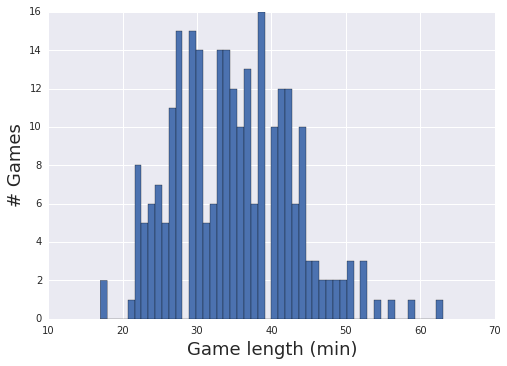

In [229]:
game_lengths = np.array([np.size(x['timeline']['frames']) for x in match_info] )
plt.hist(game_lengths, bins = 50)
plt.xlabel('Game length (min)', fontsize = 18)
_ = plt.ylabel('# Games', fontsize = 18)

In [231]:
count, bins, _ = plt.hist(np.array(games_df['gold_diff']) / 1000, bins = 50)
plt.ylabel('# Games', fontsize = 18)
plt.xlabel('Gold difference (thousands)', fontsize = 18)

NameError: name 'games_df' is not defined